# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [1]:
import numpy as np
import cv2 
from scipy import ndimage, signal
from matplotlib import pyplot as plt
import matplotlib


In [2]:
#Used to debug numpy array using print
np.set_printoptions(threshold=np.nan)


In [3]:
IMG_DIR = 'images/'

### Reading the Mosaic Image

In [4]:
def read_image(IMG_NAME):
    img = cv2.imread(IMG_NAME)
    return img[:,:,::-1] # returns the image array in RGB order

Text(0.5,1,'test image')

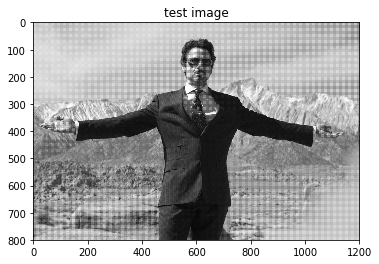

In [5]:
test_read_image = read_image(IMG_DIR+'tony.bmp')
#Plot crayon solution
plt.imshow(test_read_image)
plt.title('test image')

### Linear Interpolation

In [6]:
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    
    #Mask and retrieve red channel
    red_ch = mosaic_img[:,:,0]
    red_ch[1::2] = 0
    red_ch[:,1::2] = 0
    #Red  weights and convolution
    red_weights = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])    
    red_conv    = ndimage.convolve(red_ch, red_weights, mode='constant', cval=0.0)
    
    ##Mask and retrieve blue channel
    blue_ch = mosaic_img[:,:,2]
    blue_ch[::2] = 0
    blue_ch[:,::2] = 0    
    #Blue  weights and convolution
    blue_weights = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
    blue_conv    = ndimage.convolve(blue_ch, blue_weights, mode='constant', cval=0.0)
    
    ###Mask and retrieve green channel
    green_ch = mosaic_img[:,:,1]
    green_ch[::2, 0::2] = 0
    green_ch[1::2, 1::2] = 0
    #green  and convolution
    green_weights = np.array([[0,0.25,0],[0.25,1,0.25],[0,0.25,0]])
    green_conv    = ndimage.convolve(green_ch, green_weights, mode='constant', cval=0.0)
    
    #Construct solution image
    soln_image[:,:,0] = red_conv
    soln_image[:,:,1] = green_conv
    soln_image[:,:,2] = blue_conv
    
    return soln_image

In [7]:
def compute_errors(soln_image, original_image):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    sq_diff = (soln_image-original_image)**2 
    res_sum_diff = np.sum(sq_diff, axis = 2)
    max_err = np.amax(res_sum_diff)
    pp_err = np.mean(res_sum_diff)
    return res_sum_diff, pp_err, max_err

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

In [8]:
mosaic_img = read_image(IMG_DIR+'crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'crayons.jpg')


Text(0.5,1,'Solution Crayon Image')

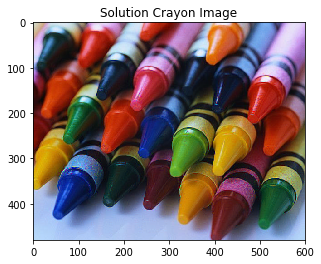

In [9]:
#Plot crayon solution
plt.imshow(soln_image/255)
plt.title('Solution Crayon Image')

In [10]:
#Write solution image to disk
cv2.imwrite('solution_crayon.jpg',soln_image[:,:,::-1])

True

In [11]:
res_pixel_diff, pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

The average per-pixel error for crayons is: 212.75303819444446
The maximum per-pixel error for crayons is: 53765.0


Text(0.5,1,'Pixel difference for crayon')

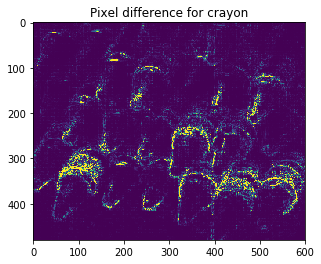

In [12]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for crayon')

In [13]:
mosaic_img = read_image(IMG_DIR+'iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'iceberg.jpg')
# For sanity check display your solution image here
### YOUR CODE

Text(0.5,1,'Solution Iceberg Image')

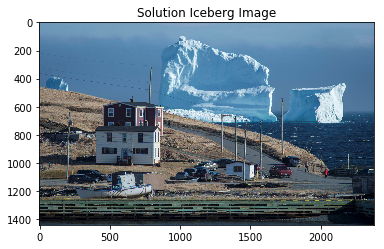

In [14]:
#Plot iceberg solution
plt.imshow(soln_image/255)
plt.title('Solution Iceberg Image')

In [15]:
#display_image('Iceberg solution', soln_image/255)
#Write solution image to disk
cv2.imwrite('solution_iceberg.jpg',soln_image[:,:,::-1])

True

In [16]:
res_pixel_diff, pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))
#print(original_image[10:20,10:20,0])

The average per-pixel error for iceberg is: 114.97222338837578
The maximum per-pixel error for iceberg is: 30553.0


Text(0.5,1,'Pixel difference for iceberg ')

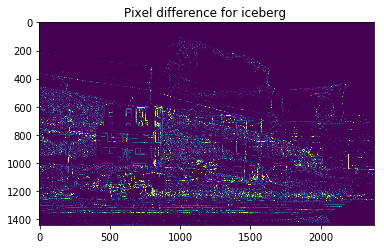

In [17]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for iceberg ')

In [18]:
mosaic_img = read_image(IMG_DIR+'tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

Text(0.5,1,'Solution Tony Image')

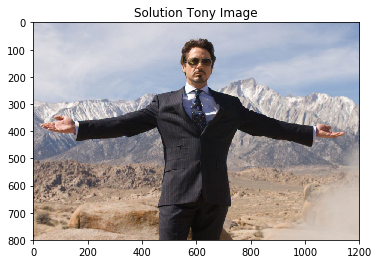

In [19]:
#Plot Tony solution
plt.imshow(soln_image/255)
plt.title('Solution Tony Image')

In [20]:
cv2.imwrite('solution_tony.jpg',soln_image[:,:,::-1])

True

In [21]:
res_pixel_diff, pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

The average per-pixel error for tony is: 58.208590625
The maximum per-pixel error for tony is: 36973.0


Text(0.5,1,'Pixel difference for Tony ')

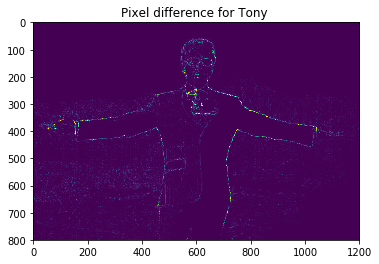

In [22]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for Tony ')

In [23]:
mosaic_img = read_image(IMG_DIR+'hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 

Text(0.5,1,'Solution Hope Image')

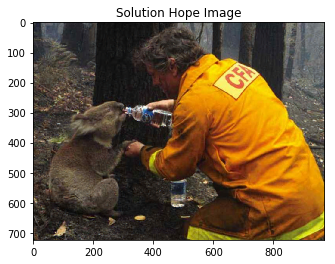

In [24]:
#Plot Hope solution
plt.imshow(soln_image/255)
plt.title('Solution Hope Image')

In [25]:
cv2.imwrite('solution_hope.jpg',soln_image[:,:,::-1])

True

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [26]:
def get_freeman_solution_image(mosaic_img, kernel_size = 3):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    ### YOUR CODE HERE ###
    linear_sol_image = get_solution_image(mosaic_img)
    freeman_soln_image = linear_sol_image
    red_conv = signal.medfilt2d(linear_sol_image[:,:,0] - linear_sol_image[:,:,1], kernel_size=kernel_size) + linear_sol_image[:,:,1]
    blue_conv = signal.medfilt2d(linear_sol_image[:,:,2] - linear_sol_image[:,:,1],kernel_size=kernel_size) + linear_sol_image[:,:,1]
    freeman_soln_image[:,:,0] = red_conv
    freeman_soln_image[:,:,2] = blue_conv
    
    return np.clip(freeman_soln_image, a_min = 0, a_max = 255)

In [27]:
mosaic_img = read_image(IMG_DIR+'tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'tony.jpg')
# For sanity check display your solution image here
### YOUR CODE

Text(0.5,1,'Freeman Solution Tony Image')

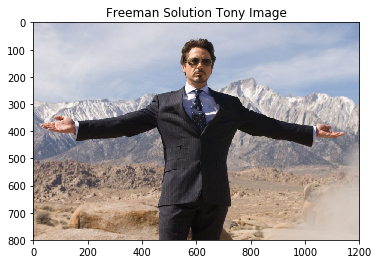

In [28]:
#Plot Tony solution
plt.imshow(soln_image/255)
plt.title('Freeman Solution Tony Image')

In [29]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

The average per-pixel error for tony is: 29.502977083333334
The maximum per-pixel error for tony is: 32278.0


In [30]:
cv2.imwrite('solution_freeman_tony.jpg',soln_image[:,:,::-1])

True

Text(0.5,1,'Pixel difference for Tony ')

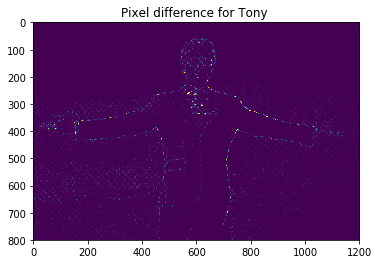

In [31]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for Tony ')

In [32]:
mosaic_img = read_image(IMG_DIR+'crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'crayons.jpg')


Text(0.5,1,'Freeman Solution crayon Image')

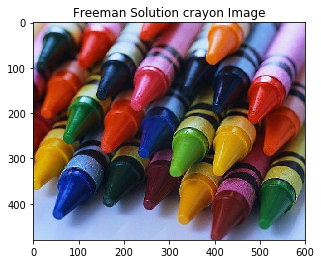

In [33]:
#Plot Crayon solution
plt.imshow(soln_image/255)
plt.title('Freeman Solution crayon Image')

In [34]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

The average per-pixel error for crayons is: 142.27091319444443
The maximum per-pixel error for crayons is: 48173.0


In [35]:
cv2.imwrite('solution_freeman_crayon.jpg',soln_image[:,:,::-1])

True

Text(0.5,1,'Pixel difference for crayons ')

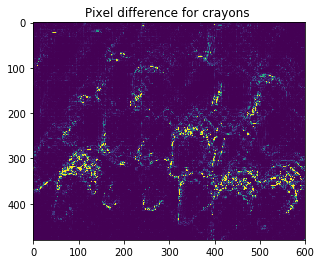

In [36]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for crayons ')

In [37]:
mosaic_img = read_image(IMG_DIR+'iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image(IMG_DIR+'iceberg.jpg')


Text(0.5,1,'Freeman Solution iceberg Image')

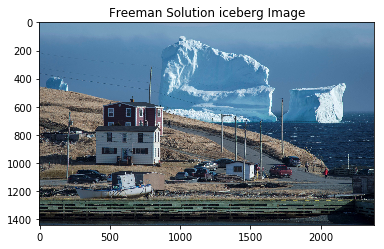

In [38]:
#Plot iceberg solution
plt.imshow(soln_image/255)
plt.title('Freeman Solution iceberg Image')

In [39]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

The average per-pixel error for iceberg is: 73.44045270081165
The maximum per-pixel error for iceberg is: 33989.0


In [42]:
cv2.imwrite('solution_freeman_iceberg.jpg',soln_image[:,:,::-1])

True

Text(0.5,1,'Pixel difference for iceberg ')

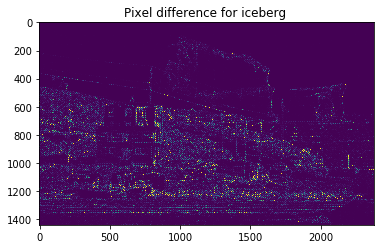

In [40]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for iceberg ')

In [41]:
mosaic_img = read_image(IMG_DIR+'hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)


Text(0.5,1,'Freeman Solution Hope Image')

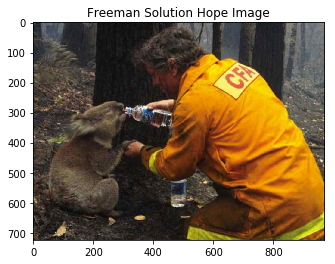

In [42]:
#Plot iceberg solution
plt.imshow(soln_image/255)
plt.title('Freeman Solution Hope Image')

In [43]:
cv2.imwrite('solution_freeman_hope.jpg',soln_image[:,:,::-1])

True

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [44]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
    
    mosaic_shape = np.shape(original_image)
    mosaic_img = np.zeros((mosaic_shape[0], mosaic_shape[1], 3))
    
    ##Mask and retrieve red channel
    red_ch = original_image[:,:,0]
    red_ch[1::2] = 0
    red_ch[:,1::2] = 0
    
    ##Mask and retrieve blue channel
    blue_ch = original_image[:,:,2]
    blue_ch[::2] = 0
    blue_ch[:,::2] = 0   
    
    ##Mask and retrieve green channel
    green_ch = original_image[:,:,1]
    green_ch[::2, 0::2] = 0
    green_ch[1::2, 1::2] = 0
    
    #Construct mosaic image
    mosaic_img[:,:,0] = red_ch + blue_ch + green_ch
    mosaic_img[:,:,1] = red_ch + blue_ch + green_ch
    mosaic_img[:,:,2] = red_ch + blue_ch + green_ch
    
    
    return mosaic_img

0.0
0.0
The average per-pixel error for Tony with calculated mosaic is: 28.821133984375
The maximum per-pixel error for for Tony with calculated mosaic is: 32278.0


Text(0.5,1,'Solution image for Tony with calculated mosaic image')

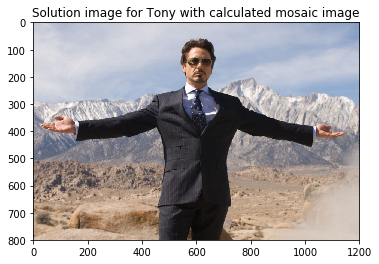

In [45]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function
original_image = read_image(IMG_DIR+'tony.jpg')
given_mosaic_img = read_image(IMG_DIR+'tony.bmp')
calc_mosaic_img = get_mosaic_image(original_image.copy())
diff = calc_mosaic_img-given_mosaic_img
print(np.amax(diff))
print(np.amin(diff))
soln_image = get_freeman_solution_image(calc_mosaic_img)
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for Tony with calculated mosaic is: "+str(pp_err))
print("The maximum per-pixel error for for Tony with calculated mosaic is: "+str(max_err))
plt.imshow(soln_image/255)
plt.title('Solution image for Tony with calculated mosaic image')


Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

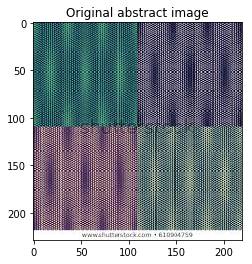

In [46]:
#Test image that breaks demosaic + interpolation
original_image = read_image(IMG_DIR+'abstract.jpg')
plt.imshow(original_image)
plt.title('Original abstract image')
calc_mosaic_img = get_mosaic_image(original_image.copy())
soln_image = get_freeman_solution_image(calc_mosaic_img)

The average per-pixel error for abstract is: 6485.304662068281
The maximum per-pixel error for abstract is: 101803.25


Text(0.5,1,'Freeman solution image for abstract image')

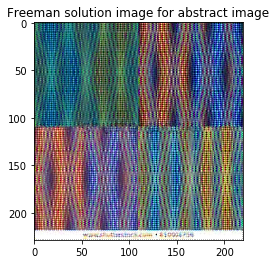

In [47]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for abstract is: "+str(pp_err))
print("The maximum per-pixel error for abstract is: "+str(max_err))
plt.imshow(soln_image/255)
plt.title('Freeman solution image for abstract image')

Text(0.5,1,'Pixel difference for abstract ')

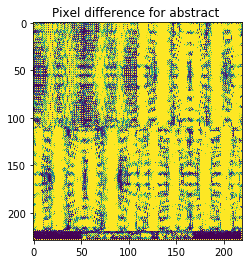

In [48]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for abstract ')

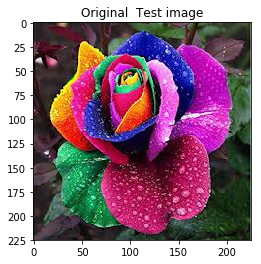

In [49]:
#Flower image that works for demosaic + interpolation
original_image = read_image(IMG_DIR +'flower.jpg')
plt.imshow(original_image)
plt.title('Original  Test image')
calc_mosaic_img = get_mosaic_image(original_image.copy())
soln_image = get_freeman_solution_image(calc_mosaic_img)

The average per-pixel error for Flower is: 636.3399395061729
The maximum per-pixel error for Flower is: 47289.8125


Text(0.5,1,'Freeman solution image for Flower image')

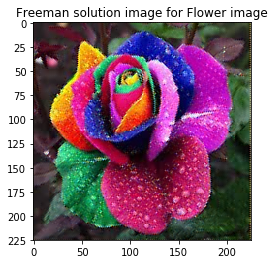

In [50]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for Flower is: "+str(pp_err))
print("The maximum per-pixel error for Flower is: "+str(max_err))
plt.imshow(soln_image/255)
plt.title('Freeman solution image for Flower image')

Text(0.5,1,'Pixel difference for Flower ')

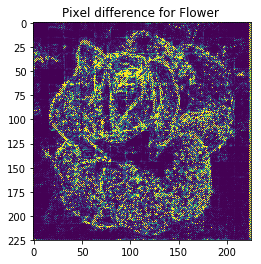

In [51]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for Flower ')

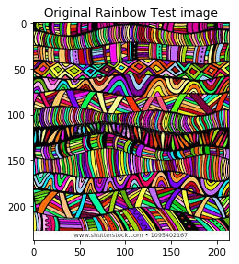

In [52]:
#Maze image that works for demosaic + interpolation
original_image = read_image(IMG_DIR +'rainbow.jpg')
plt.imshow(original_image)
plt.title('Original Rainbow Test image')
calc_mosaic_img = get_mosaic_image(original_image.copy())
soln_image = get_freeman_solution_image(calc_mosaic_img)

The average per-pixel error for rainbow is: 5080.670696648244
The maximum per-pixel error for rainbow is: 112696.8125


Text(0.5,1,'Freeman solution image for rainbow image')

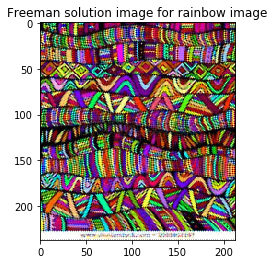

In [53]:
res_pixel_diff,pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for rainbow is: "+str(pp_err))
print("The maximum per-pixel error for rainbow is: "+str(max_err))
plt.imshow(soln_image/255)
plt.title('Freeman solution image for rainbow image')

Text(0.5,1,'Pixel difference for Rainbow ')

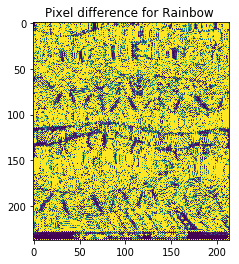

In [54]:
#Plot pixel difference
plt.imshow(res_pixel_diff, vmin = 0, vmax = 2048)
plt.title('Pixel difference for Rainbow ')

### Bonus Points

In [4]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####